## Importing Necessary Packages and Directories

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import os
import cv2
from PIL import Image
import skimage

In [3]:
root_dir = "C:/Users/ARRUN/IEEE Paper Data"
test_imgs_dir = "C:/Users/ARRUN/IEEE Paper Data/image_chips_test"
test_img_labels = "C:/Users/ARRUN/IEEE Paper Data/image_test_labels"
img_sizes = [row,col,chan] = [750,750,3]

## Adjusting Bounding Boxes and getting in poly format

In [4]:
width_adj = height_adj = int((1024 - 750)/2)
print(width_adj)

137


In [5]:
os.chdir(test_img_labels)

converter = lambda x:int(x)
#Traverse all csv files
def find_bbox(filename):   # reads the csv 
    os.chdir(test_img_labels)
    df = pd.read_csv('testImageLabels.csv')

    f = []
    all_x_coords = []# nested list of all x coordinates of all images
    all_y_coords = []# nested list of all y coordinates of all images

    for bboxes in range(len(df['region_shape_attributes'])):
        f.append(df['filename'].iloc[bboxes])
        val = df['region_shape_attributes'].iloc[bboxes]
        if(val != "{}"):
            x_coords = val.split('],[')[0][2:].split(',')
            y_coords = val.split('],[')[1][:-2].split(',')
            temp_x = []
            temp_y = []
            for x in range(len(x_coords)):
                temp_x.append(int(x_coords[x]))
                temp_y.append(int(y_coords[x]))    
            
        else:
            temp_x = []
            temp_y = []

        all_x_coords.append(temp_x)   
        all_y_coords.append(temp_y)
        
    return [f,all_x_coords,all_y_coords]

In [6]:
find_bbox('testImageLabels.csv')

[['test_img_1.jpg',
  'test_img_2.jpg',
  'test_img_3.jpg',
  'test_img_3.jpg',
  'test_img_4.jpg',
  'test_img_5.jpg',
  'test_img_6.jpg',
  'test_img_7.jpg',
  'test_img_7.jpg',
  'test_img_7.jpg',
  'test_img_8.jpg',
  'test_img_9.jpg',
  'test_img_9.jpg',
  'test_img_10.jpg',
  'test_img_10.jpg',
  'test_img_10.jpg',
  'test_img_11.jpg',
  'test_img_12.jpg',
  'test_img_13.jpg',
  'test_img_14.jpg',
  'test_img_15.jpg',
  'test_img_16.jpg',
  'test_img_16.jpg',
  'test_img_17.jpg',
  'test_img_18.jpg',
  'test_img_19.jpg',
  'test_img_19.jpg',
  'test_img_20.jpg',
  'test_img_20.jpg',
  'test_img_20.jpg',
  'test_img_21.jpg',
  'test_img_22.jpg',
  'test_img_23.jpg',
  'test_img_24.jpg',
  'test_img_24.jpg',
  'test_img_25.jpg'],
 [[0, 428, 428, 503, 500, 747, 747, 271, 300, 0, 0],
  [230,
   259,
   331,
   386,
   500,
   442,
   515,
   491,
   502,
   523,
   505,
   393,
   390,
   309,
   316,
   280,
   296,
   227],
  [123, 173, 194, 216, 306, 353, 421, 248, 160, 192, 139, 

In [7]:
def bounding_box(val):
    f,all_x,all_y = val 
    all_indi_coords = []
    for i in range(len(all_x)):
        indi_x = all_x[i]
        indi_y = all_y[i]
        indi_coords = []
        if(indi_x!=[]):
            for j in range(len(indi_x)):
                temp = [indi_x[j],indi_y[j]]
                indi_coords.append(temp)
        else:
            indi_coords.append('')
        all_indi_coords.append(np.array([indi_coords]))
    return [f,all_indi_coords]

In [8]:
res = bounding_box(find_bbox("testImageLabels.csv"))
res # filename - [x,y]

[['test_img_1.jpg',
  'test_img_2.jpg',
  'test_img_3.jpg',
  'test_img_3.jpg',
  'test_img_4.jpg',
  'test_img_5.jpg',
  'test_img_6.jpg',
  'test_img_7.jpg',
  'test_img_7.jpg',
  'test_img_7.jpg',
  'test_img_8.jpg',
  'test_img_9.jpg',
  'test_img_9.jpg',
  'test_img_10.jpg',
  'test_img_10.jpg',
  'test_img_10.jpg',
  'test_img_11.jpg',
  'test_img_12.jpg',
  'test_img_13.jpg',
  'test_img_14.jpg',
  'test_img_15.jpg',
  'test_img_16.jpg',
  'test_img_16.jpg',
  'test_img_17.jpg',
  'test_img_18.jpg',
  'test_img_19.jpg',
  'test_img_19.jpg',
  'test_img_20.jpg',
  'test_img_20.jpg',
  'test_img_20.jpg',
  'test_img_21.jpg',
  'test_img_22.jpg',
  'test_img_23.jpg',
  'test_img_24.jpg',
  'test_img_24.jpg',
  'test_img_25.jpg'],
 [array([[[  0, 258],
          [428, 204],
          [428, 233],
          [503, 223],
          [500, 162],
          [747, 125],
          [747, 258],
          [271, 345],
          [300, 546],
          [  0, 604],
          [  0, 255]]]),
  array([[[

In [9]:
res[0][0]

'test_img_1.jpg'

In [10]:
def combine(res):
    all_new_coords=[]
    file_name=res[0][0]
    coords=res[1]
    f_name = [file_name]
    new_coords = [coords[0]]
    for i in range(1,len(coords)):
        
        if res[0][i]!=res[0][i-1]:
            f_name.append(res[0][i])
            all_new_coords.append(new_coords)
            new_coords = [coords[i]]
        else:
            new_coords.append(coords[i])

    all_new_coords.append(new_coords)
    return [f_name,all_new_coords]

In [11]:
combine(res)[1][2]

[array([[[123, 223],
         [173, 151],
         [194, 165],
         [216, 131],
         [306, 183],
         [353, 106],
         [421, 147],
         [248, 426],
         [160, 376],
         [192, 321],
         [139, 290],
         [161, 249],
         [121, 224]]]),
 array([[[412, 305],
         [374, 281],
         [402, 240],
         [596, 354],
         [389, 708],
         [246, 621],
         [313, 519],
         [290, 506],
         [417, 309],
         [412, 305]]])]

In [12]:
def masking_plots(combined_coords):  
    os.chdir(test_imgs_dir)
    all_mask_imgs = []
    for i in range(len(combined_coords[0])):
        img = plt.imread(combined_coords[0][i])
        img_mod = np.zeros((750,750,3))
        if (len(combine(res)[1][i][0][0])>1):
            for j in range(len(combined_coords[1][i])):
                img_mod = cv2.fillPoly(img, combined_coords[1][i][j],(255,255,255))
        all_mask_imgs.append(img_mod)
    return all_mask_imgs

In [13]:
fin_res = masking_plots(combine(res))
print(np.shape(fin_res))

(25, 750, 750, 3)


In [14]:
fin_masks = []
for img in range(25):
    ch = np.zeros((750,750))
    for i in range(3):
        ch += fin_res[img][:,:,i]
    ch = np.floor(ch/(255*3))
    fin_masks.append(ch)

In [15]:
def create_canvas(matrix_size,imgs):
    w = 750
    h = 750
    canvas = np.zeros((w * matrix_size, h *matrix_size))
    index = 0
    for i in range(0, w * matrix_size , w):
        for j in range(0, h * matrix_size , h):
            canvas[i: i+w, j: j + h] = imgs[index]
            index += 1
    return canvas

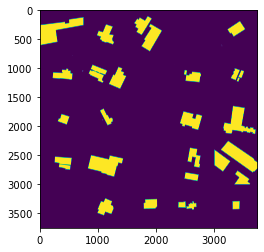

In [16]:
GT_Test = create_canvas(5,fin_masks)
plt.imshow(GT_Test)
plt.show()

## Actual Execution

In [17]:
pip show mask-rcnn

Name: mask-rcnnNote: you may need to restart the kernel to use updated packages.

Version: 2.1
Summary: Mask R-CNN for object detection and instance segmentation
Home-page: https://github.com/matterport/Mask_RCNN
Author: Matterport
Author-email: waleed.abdulla@gmail.com
License: MIT
Location: c:\users\arrun\anaconda3\lib\site-packages\mask_rcnn-2.1-py3.8.egg
Requires: 
Required-by: 


In [18]:
import mrcnn
from mrcnn.visualize import display_instances
from mrcnn.config import Config
from mrcnn.model import MaskRCNN
from mrcnn import model as modellib, utils
from mrcnn import visualize
from mrcnn.model import log

## Architecture for Mask RCNN

In [19]:
class SubstationConfig(Config):
    """Configuration for training on the toy  dataset.
    Derives from the base Config class and overrides some values.
    """
    # Give the configuration a recognizable name
    NAME = "substation"
    
    BATCH_SIZE = 1
    # We use a GPU with 12GB memory, which can fit two images.
    # Adjust down if you use a smaller GPU.
    IMAGES_PER_GPU = 2
    
    # Number of classes (including background)
    NUM_CLASSES = 1 + 1  # Background + substation

    # Number of training steps per epoch
    STEPS_PER_EPOCH = 100
    
    # Skip detections with < 95% confidence
    DETECTION_MIN_CONFIDENCE = 0.9
    
    # use small validation steps since the epoch is small
    VALIDATION_STEPS = 5
    
config = SubstationConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     2
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 2
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

## Inference

In [20]:
class InferenceConfig(SubstationConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
inference_config = InferenceConfig()

# Recreate the model in inference mode
model = modellib.MaskRCNN(mode="inference", 
                          config=inference_config,
                          model_dir=root_dir)

# Get path to saved weights
# Either set a specific path or find last trained weights
model_path = root_dir+"/substation20210722T1951_CPUFinal/mask_rcnn_substation_0004.h5"
#model_path = model.find_last()

# Load trained weights
print("Loading weights from ", model_path)

model.load_weights(model_path, by_name=True)

Instructions for updating:
Use fn_output_signature instead
Loading weights from  C:/Users/ARRUN/IEEE Paper Data/substation20210722T1951_CPUFinal/mask_rcnn_substation_0004.h5


In [21]:
def merged_mask(masks):
    """
    merge mask into one and return merged mask
    """
    n = masks.shape[2]
    
    if n!=0:        
        merged_mask = np.zeros((masks.shape[0], masks.shape[1]))
        for i in range(n):
            merged_mask+=masks[...,i]
        merged_mask=np.asarray(merged_mask,dtype=np.uint8)   
        return merged_mask
    return masks

In [22]:
def compute_iou(predict_mask, gt_mask):
    iou_indi_score = []
    intersection = np.logical_and(predict_mask, gt_mask)#*
    union = np.logical_or(predict_mask, gt_mask)# +
    iou_score = np.sum(intersection) / np.sum(union)
    for i in range(0,3750,750):
        for j in range(0,3750,750):
            intersect_indi = np.logical_and(predict_mask[i:i+750,j:j+750], gt_mask[i:i+750,j:j+750])#*
            union_indi = np.logical_or(predict_mask[i:i+750,j:j+750], gt_mask[i:i+750,j:j+750])# +
            iou_indi_score.append(np.sum(intersect_indi) / np.sum(union_indi))
    return iou_score, iou_indi_score

## Testing on Test image Mosaic

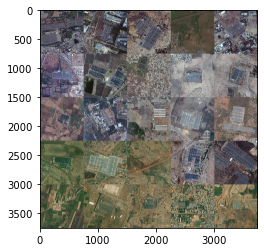

In [23]:
os.chdir(root_dir)
img = plt.imread("mosaic_test_image.jpg")
plt.imshow(img)
plt.show()

In [24]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

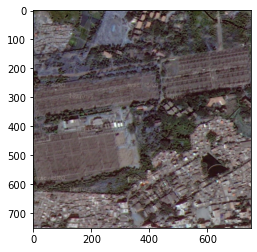

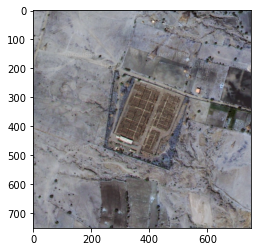

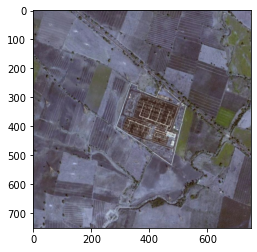

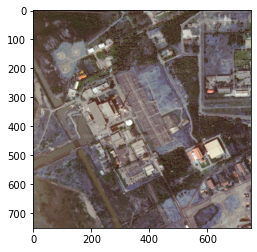

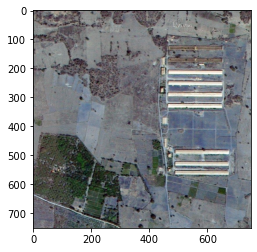

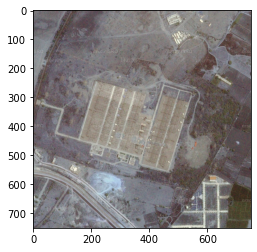

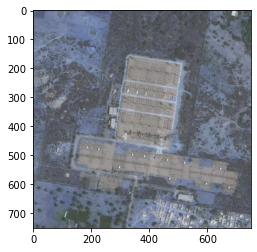

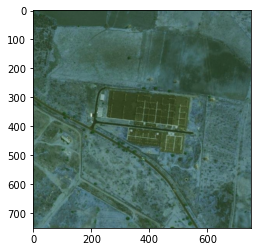

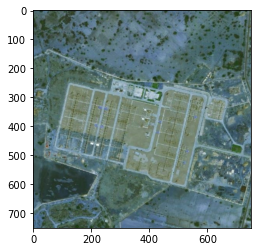

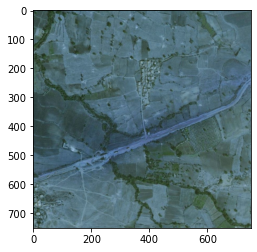

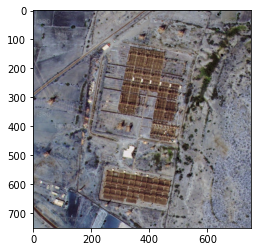

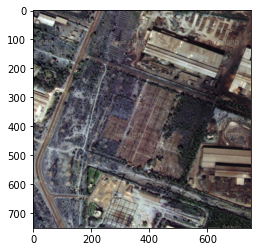

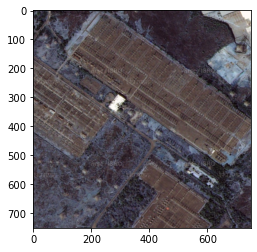

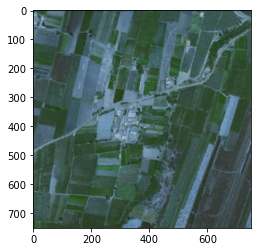

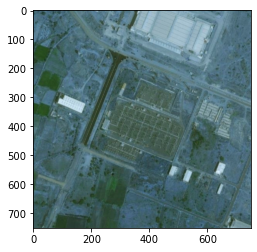

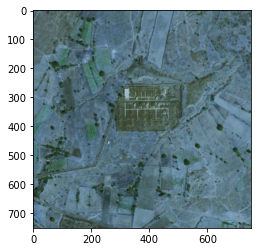

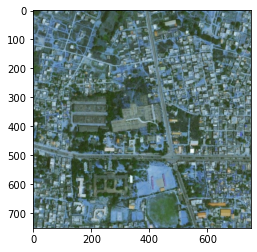

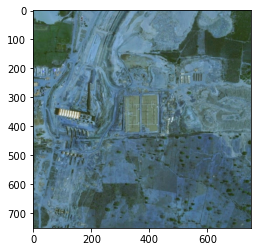

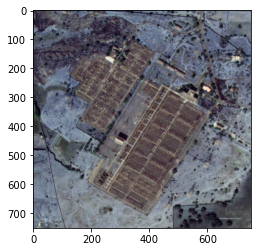

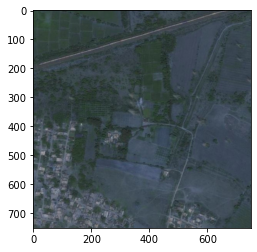

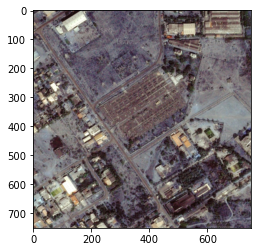

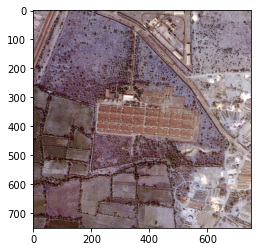

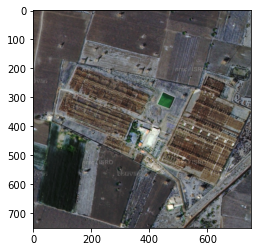

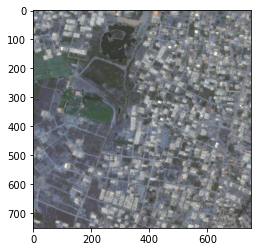

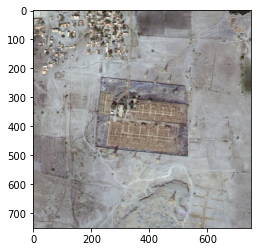

In [25]:
class_names = ['BG','Substation']
os.chdir(root_dir+"/image_chips_test")
for i in os.listdir(root_dir+"/image_chips_test"):
    img = plt.imread(i)
    plt.imshow(img)
    plt.show()

In [26]:
def crop_out(image):
    #print(img.shape)
    width_adj = height_adj = int((1024 - 750)/2)
    img = image[height_adj:height_adj+750,width_adj:width_adj+750]
    #print(img.shape)
    return tf.keras.preprocessing.image.img_to_array(img)

In [27]:
class_names = ['BG','Substation']
pred_masks = []
for i in range(1,26):
    os.chdir(root_dir+"/image_chips_test")
    file_name = f"test_img_{i}.jpg"
    img = plt.imread(file_name)
    img = img_to_array(img)
    # Run object detection
    results = model.detect([img], verbose=1)
    r = results[0]['masks']*255
    if(r.size > 0):
        predicted_mask = merged_mask(r)
        pred_masks.append(predicted_mask)
    else:
        pred_masks.append(np.zeros((750,750)))

Processing 1 images
image                    shape: (750, 750, 3)         min:    0.00000  max:  255.00000  float32
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


C:\Users\ARRUN\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Processing 1 images
image                    shape: (750, 750, 3)         min:    0.00000  max:  255.00000  float32
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 1 images
image                    shape: (750, 750, 3)         min:    0.00000  max:  253.00000  float32
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  126.92695  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 1 images
image                    shape: (750, 750, 3)         min:   15.00000  max:  192.00000  float32
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max: 

In [28]:
pred_canvas = create_canvas(5,pred_masks)

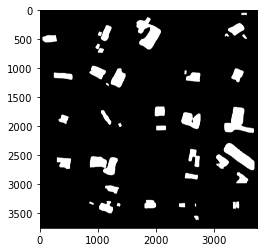

In [29]:
plt.imshow(pred_canvas,cmap='gray')
plt.show()

In [30]:
iou_ind,iou = compute_iou(pred_canvas, GT_Test)

<ipython-input-22-a8d844bfd3c1>:10: RuntimeWarning: invalid value encountered in long_scalars
  iou_indi_score.append(np.sum(intersect_indi) / np.sum(union_indi))


In [31]:
print(iou_ind)
iou = pd.DataFrame(iou)
iou.fillna(0,inplace = True)

0.6483526028296241


In [32]:
iou.head(25)

,0
0,0.171310
1,0.511827
2,0.802728
3,0.000000
4,0.700363
5,0.704943
6,0.791692
7,0.000000
8,0.856965
9,0.742394
